## 파이썬 기초 및 머신러닝 기말 프로젝트 과제
## 자전거 대여 수요 예측 캐글 데이터 - 회귀
20183166 민지현

https://www.kaggle.com/c/bike-sharing-demand/data

캐글 데이터 다운로드 주소

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

## 캐글 요구 성능 평가 방법

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE). The RMSLE is calculated as


Where:

logarithm

: 오류 값의 로그에 대한 RMSLE

## 캐글 제공 데이터 정보
Data Fields

datetime - hourly date + timestamp  

season - 

 1 = spring
 
 2 = summer
 
 3 = fall
 
 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

 1. Clear, Few clouds, Partly cloudy, Partly cloudy

 2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

 3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

 4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals


In [38]:
data = pd.read_csv(r'C:\Users\alswl\Desktop\ML 기말과제\train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
print(data.shape)
data.info()

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## 데이터 전처리

In [40]:
# 날짜 칼럼 날짜형 데이터로 변환
data['datetime'] = data.datetime.apply(pd.to_datetime)

# 연, 월, 일, 시간을 별도로 추출하고 본래 칼럼 삭제
data['year'] = data.datetime.apply(lambda x : x.year)
data['month'] = data.datetime.apply(lambda x : x.month)
data['day'] = data.datetime.apply(lambda x : x.day)
data['hour'] = data.datetime.apply(lambda x : x.hour)
data.drop('datetime', axis=1, inplace=True)
data.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


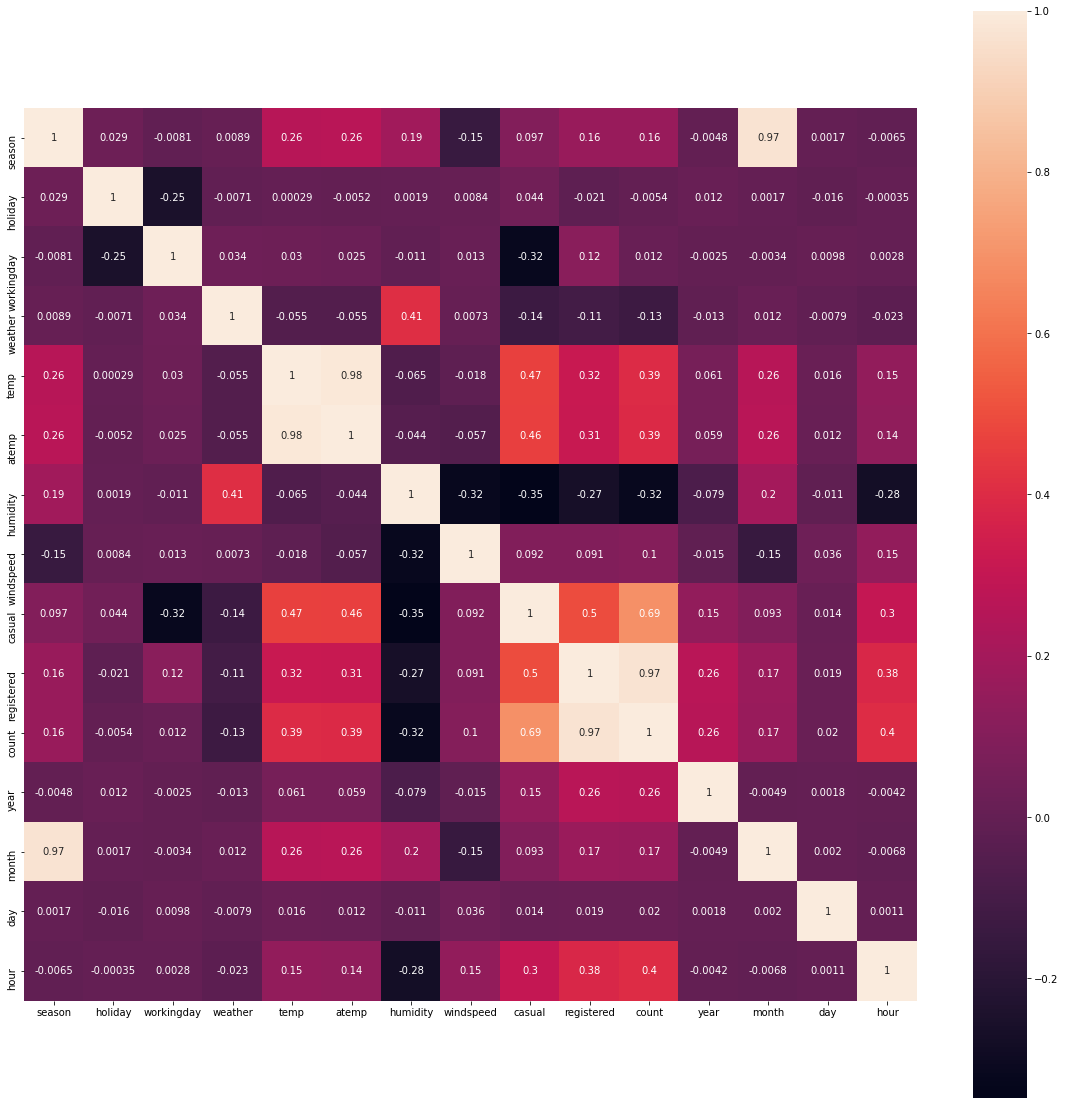

In [42]:
#칼럼 간의 상관계수 시각화 : heatmap

fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(data.corr(),annot=True,square=True)

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

즉, casual + registered = count로 상관계수가 높게 나타난다.

해당 캐글 경진대회의 목적은 count를 회귀예측하는 것이므로

casual 칼럼과 registered 칼럼은 제거한다.

In [43]:
data.drop(['casual', 'registered'], axis=1, inplace=True)

<AxesSubplot:xlabel='count', ylabel='Density'>

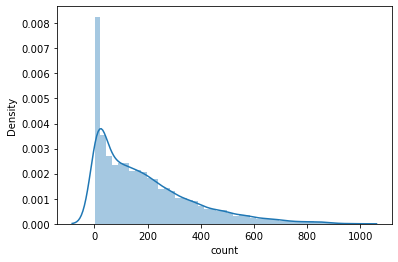

In [65]:
sns.distplot(y)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


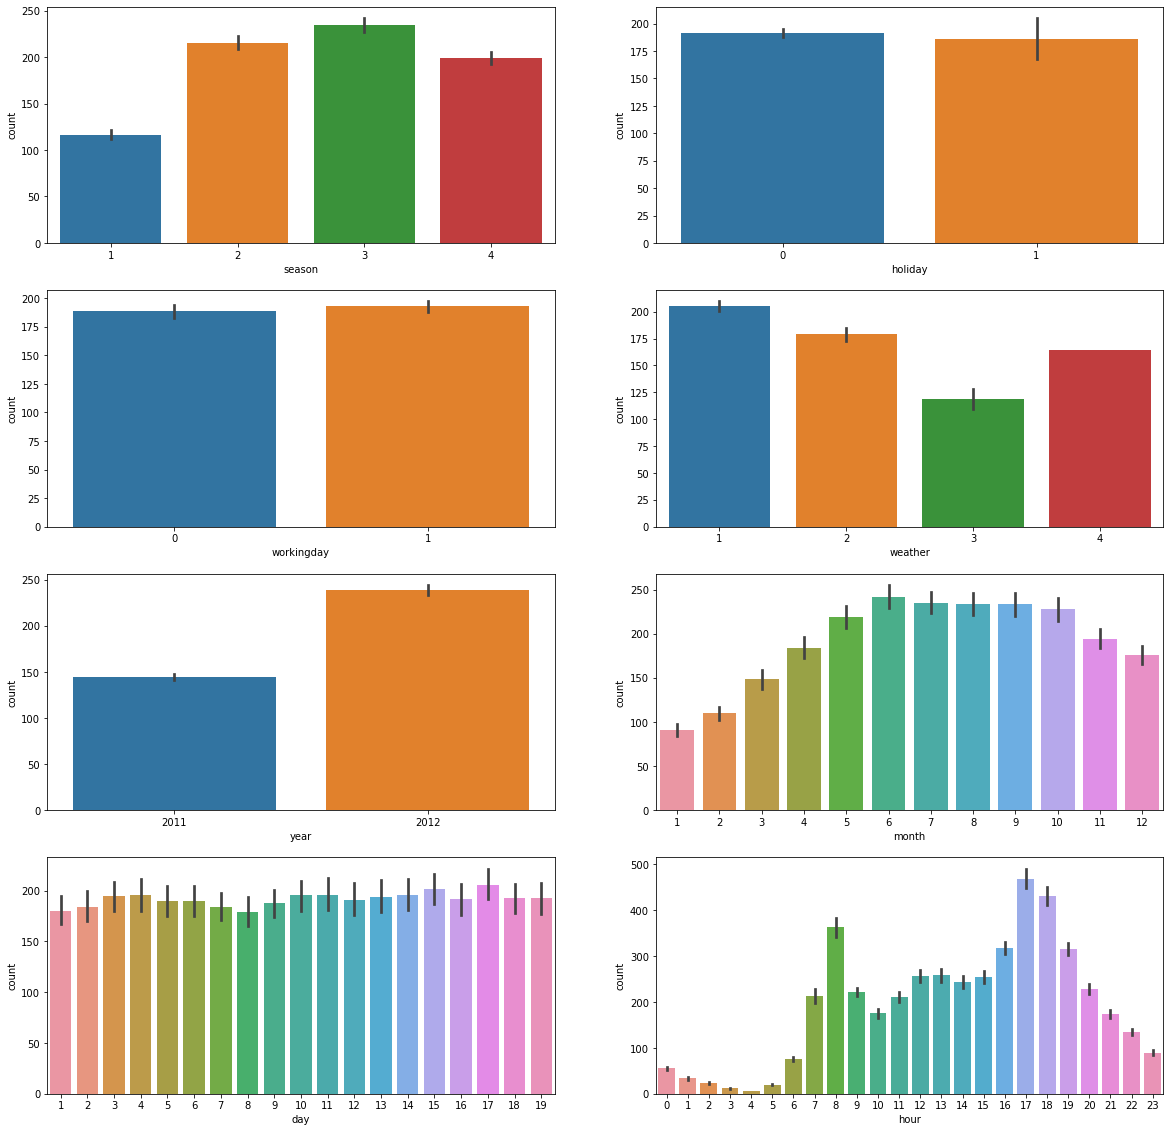

In [9]:
fig = plt.figure(figsize=[20, 20])
ax1 = fig.add_subplot(4,2,1)
ax1 = sns.barplot(x='season',y='count',data=data)

ax2 = fig.add_subplot(4,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=data)

ax3 = fig.add_subplot(4,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=data)

ax4 = fig.add_subplot(4,2,4)
ax4 = sns.barplot(x='weather',y='count',data=data)

ax5 = fig.add_subplot(4,2,5)
ax5 = sns.barplot(x='year',y='count',data=data)

ax6 = fig.add_subplot(4,2,6)
ax6 = sns.barplot(x='month',y='count',data=data)

ax7 = fig.add_subplot(4,2,7)
ax7 = sns.barplot(x='day',y='count',data=data)

ax8 = fig.add_subplot(4,2,8)
ax8 = sns.barplot(x='hour',y='count',data=data)

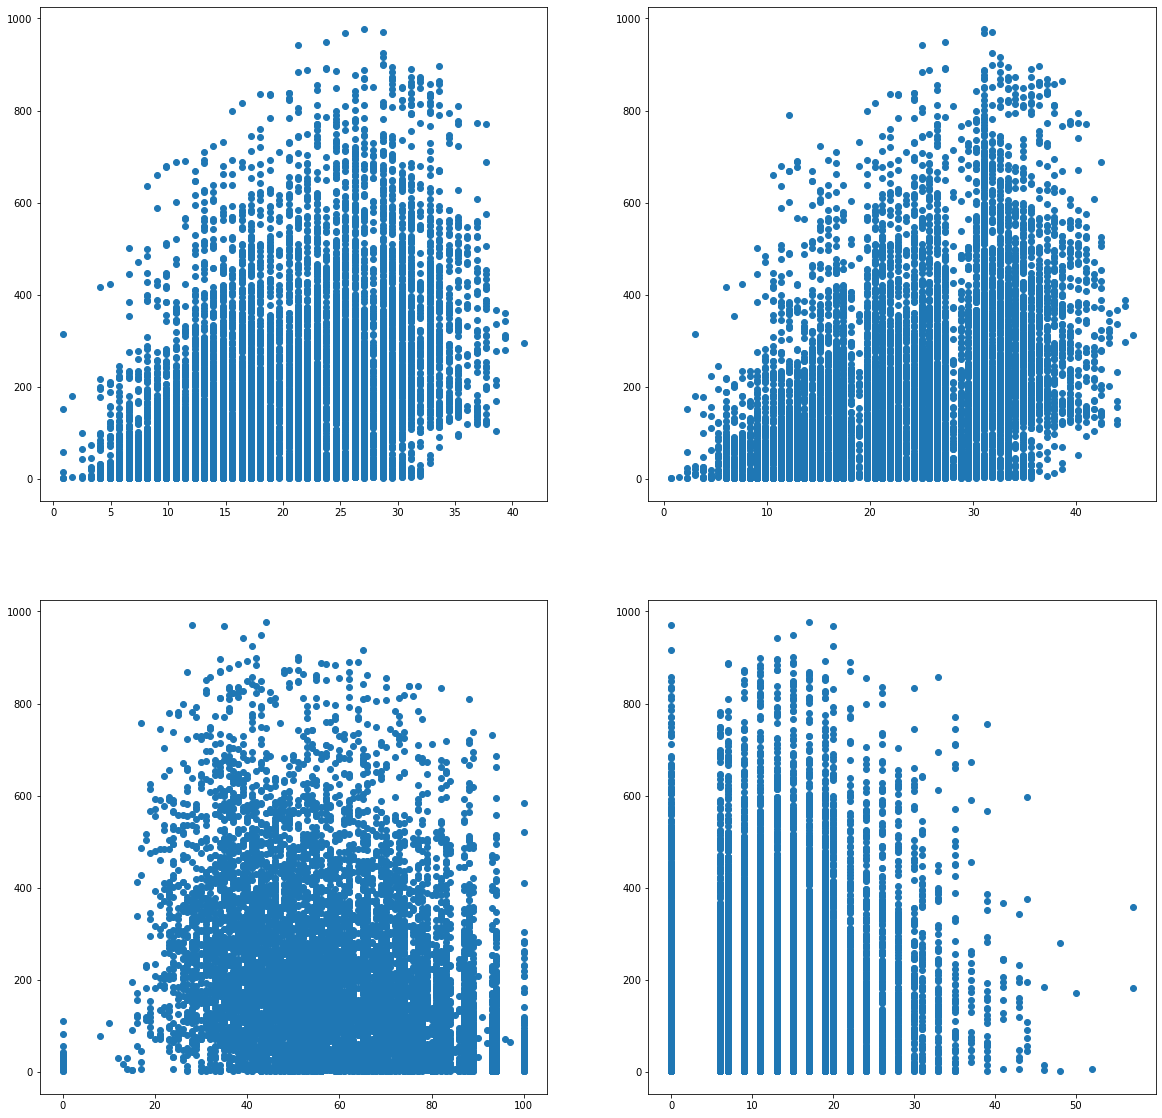

In [10]:
fig = plt.figure(figsize=[20, 20])
ax1 = fig.add_subplot(2,2,1)
ax1 = plt.scatter(x='temp',y='count',data=data)

ax2 = fig.add_subplot(2,2,2)
ax2 = plt.scatter(x='atemp',y='count',data=data)

ax3 = fig.add_subplot(2,2,3)
ax3 = plt.scatter(x='humidity',y='count',data=data)

ax4 = fig.add_subplot(2,2,4)
ax4 = plt.scatter(x='windspeed',y='count',data=data)


연도, 월, 일, 시간, 주말, 평일, 계절, 날씨 변수는 카테고리형 변수이다.

이를 숫자형 칼럼으로 둔 채로 회귀를 진행하면 왜곡이 발생한다.

따라서 pandas의 get_dummies()를 이용해 원핫 인코딩을 통해 데이터를 변환해준다.

In [45]:
data = pd.get_dummies(data, columns=['season', 'holiday', 'workingday', 'weather',
                                    'year', 'month', 'day', 'hour'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 74 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          10886 non-null  float64
 1   atemp         10886 non-null  float64
 2   humidity      10886 non-null  int64  
 3   windspeed     10886 non-null  float64
 4   count         10886 non-null  int64  
 5   season_1      10886 non-null  uint8  
 6   season_2      10886 non-null  uint8  
 7   season_3      10886 non-null  uint8  
 8   season_4      10886 non-null  uint8  
 9   holiday_0     10886 non-null  uint8  
 10  holiday_1     10886 non-null  uint8  
 11  workingday_0  10886 non-null  uint8  
 12  workingday_1  10886 non-null  uint8  
 13  weather_1     10886 non-null  uint8  
 14  weather_2     10886 non-null  uint8  
 15  weather_3     10886 non-null  uint8  
 16  weather_4     10886 non-null  uint8  
 17  year_2011     10886 non-null  uint8  
 18  year_2012     10886 non-nu

train dataset을 train / validation set으로 나누어 학습 / 예측을 진행한다.

이후 가장 성능이 좋다고 판단되는 model로 test dataset에 최종 예측을 수행한다.

In [46]:
X = data.drop(['count'], axis=1, inplace=False)
y = data['count']
X.shape

(10886, 73)

In [47]:
# rmsle 제공 기능이 없으므로 rmsle 함수 직접 생성
def rmsle(y, pred):
    log_y = np.log(y)
    log_pred = np.log(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [9]:
from pycaret.regression import *

In [10]:
reg1 = setup(data=data, target='count', train_size=0.8)

,Description,Value
0,session_id,7536
1,Target,count
2,Original Data,"(10886, 76)"
3,Missing Values,False
4,Numeric Features,75
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(8708, 72)"


In [58]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,31.5261,2217.9647,47.0514,0.9326,0.5406,0.6807,0.3460
xgboost,Extreme Gradient Boosting,31.9497,2322.8295,48.1473,0.9294,0.5364,0.6442,1.1100
et,Extra Trees Regressor,29.8155,2363.4870,48.5596,0.9283,0.4041,0.4126,2.4130
rf,Random Forest Regressor,33.8133,2698.0198,51.8773,0.9181,0.4948,0.6063,1.9710
dt,Decision Tree Regressor,44.3981,5314.5868,72.7488,0.8377,0.5887,0.5571,0.0460
gbr,Gradient Boosting Regressor,58.8448,6686.8246,81.7246,0.7971,0.8130,1.5363,0.5080
lr,Linear Regression,75.2845,10279.9735,101.3184,0.6882,1.0345,2.9857,1.2050
ridge,Ridge Regression,75.2566,10280.7198,101.3222,0.6882,1.0328,2.9758,0.0110
br,Bayesian Ridge,75.2525,10280.8409,101.3228,0.6882,1.0321,2.9715,0.0390
lasso,Lasso Regression,77.4150,10977.2236,104.6917,0.6672,1.0300,2.7539,0.0170


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=357, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [56]:
et_reg = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.0306,6.1432,2.4785,0.9998,0.0102,0.0052
1,1.1424,11.4369,3.3818,0.9997,0.0153,0.0059
2,1.1492,8.5205,2.9190,0.9997,0.0114,0.0054
3,1.1202,6.6732,2.5833,0.9998,0.0158,0.0055
4,0.9626,5.2545,2.2923,0.9998,0.0082,0.0047
5,1.0897,7.1205,2.6684,0.9998,0.0105,0.0049
6,1.0119,4.3822,2.0934,0.9999,0.0083,0.0048
7,0.9681,5.4340,2.3311,0.9998,0.0070,0.0042
8,1.1523,19.0380,4.3633,0.9994,0.0082,0.0046
9,1.1552,13.6212,3.6907,0.9996,0.0079,0.0046


In [81]:
rf_reg = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3585,9.5372,3.0882,0.9997,0.0216,0.0075
1,1.4429,17.7142,4.2088,0.9995,0.0190,0.0073
2,1.4163,13.6209,3.6907,0.9996,0.0154,0.0073
3,1.4207,12.4268,3.5252,0.9997,0.0177,0.0075
4,1.3013,7.3996,2.7202,0.9998,0.0120,0.0067
5,1.3960,12.2850,3.5050,0.9996,0.0130,0.0065
6,1.3410,6.8799,2.6230,0.9998,0.0123,0.0068
7,1.2537,8.7599,2.9597,0.9997,0.0106,0.0062
8,1.4259,17.5482,4.1891,0.9994,0.0119,0.0066
9,1.3089,12.4725,3.5316,0.9996,0.0108,0.0060


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
# model1 Linear regression

lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
pred = lr_reg.predict(X_test)

print('Linear Regression RMSLE값:', round(rmsle(y_test, pred), 4))

Linear Regression RMSLE값: 0.8971


In [30]:
# model2 Ridge

param = {'alpha': np.logspace(-4, 0, 200) }
ridge_reg = GridSearchCV(Ridge(), param, scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)
print(ridge_reg.best_params_)

{'alpha': 0.47686116977144694}


In [31]:
ridge_reg = Ridge(alpha = 0.47686116977144694)
ridge_reg.fit(X_train,y_train)
pred = ridge_reg.predict(X_test)
print('Ridge Regression RMSLE값:', round(rmsle(y_test, pred), 4))

Ridge Regression RMSLE값: 0.8911


In [32]:
# model3 Lasso

param = {'alpha': np.logspace(-4, 0, 200) }
lasso_reg = GridSearchCV(Lasso(), param, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)
print(lasso_reg.best_params_)

{'alpha': 0.06517339604882427}


In [34]:
lasso_reg = Lasso(alpha = 0.06517339604882427)
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)
print('Lasso Regression RMSLE값:', round(rmsle(y_test, pred), 4))

Lasso Regression RMSLE값: 0.8862


In [69]:
# model4 RandomForest Regression

param = {'n_estimators': [500, 700, 1000],
         'max_features': [2, 4, 6, 8],
         'max_depth': [None, 1, 2, 3],
         'min_samples_split': [1, 2, 3]}

rf_reg = GridSearchCV(RandomForestRegressor(), param, cv=5,  scoring='neg_mean_squared_error')
rf_reg.fit(X_train,y_train)
print(rf_reg.best_params_)

{'max_depth': None, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [78]:
rf_reg = RandomForestRegressor(max_features=8, min_impurity_decrease=0.0,min_samples_leaf=1,
                               min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=1000)
rf_reg.fit(X_train,y_train)
pred = rf_reg.predict(X_test)
print('RandomForest Regression RMSLE값:', round(rmsle(y_test, pred), 4))

RandomForest Regression RMSLE값: 0.8106


In [86]:
rf_reg2 = RandomForestRegressor(min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1)
rf_reg2.fit(X_train,y_train)
pred = rf_reg2.predict(X_test)
print('RandomForest Regression RMSLE값:', round(rmsle(y_test, pred), 4))

RandomForest Regression RMSLE값: 0.5286


In [15]:
# model5 ExtraTrees Regression

param = {'n_estimators': [500, 700, 1000],
         'max_features': [2, 4, 6, 8],
         'max_depth': [None, 1, 2, 3],
         'min_samples_split': [1, 2, 3]}

et_reg = GridSearchCV(ExtraTreesRegressor(), param, cv=5,  scoring='neg_mean_squared_error')
et_reg.fit(X_train,y_train)
print(et_reg.best_params_)

{'max_depth': None, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 500}


In [50]:
et_reg = ExtraTreesRegressor(max_depth=None, max_features=8,
                               min_samples_split=2, n_estimators=500)
et_reg.fit(X_train,y_train)
pred = et_reg.predict(X_test)
print('ExtraTree Regression RMSLE값:', round(rmsle(y_test, pred), 4))

ExtraTree Regression RMSLE값: 0.6629


In [80]:
et_reg2 = ExtraTreesRegressor(max_features='auto', min_impurity_decrease=0.0, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1)
et_reg2.fit(X_train,y_train)
pred = et_reg2.predict(X_test)
print('ExtraTree Regression RMSLE값:', round(rmsle(y_test, pred), 4))

ExtraTree Regression RMSLE값: 0.4442


In [16]:
# model 6 XGB Regressor

param = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 1.0],
        'max_depth': [3, 5, 7]
        }

xgb_reg = GridSearchCV(XGBRegressor(), param, cv=5,  scoring='neg_mean_squared_error')
xgb_reg.fit(X_train,y_train)
print(xgb_reg.best_params_)

{'colsample_bytree': 1.0, 'gamma': 5, 'max_depth': 7, 'min_child_weight': 5, 'subsample': 1.0}


In [51]:
xgb_reg = XGBRegressor(colsample_bytree=1.0, gamma=5,
                              max_depth=7, min_child_weight= 5, subsample=1.0)
xgb_reg.fit(X_train,y_train)
pred = xgb_reg.predict(X_test)
print('XGB Regression RMSLE값:', round(rmsle(y_test, pred), 4))

XGB Regression RMSLE값: 0.5734


In [24]:
# model 7 LGBM Regressor

param = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [3, 5, 7],
    'num_leaves': [50, 100, 200],
    'min_split_gain': [0.3, 0.4],
}

lgbm_reg = GridSearchCV(LGBMRegressor(), param, cv=5,  scoring='neg_mean_squared_error')
lgbm_reg.fit(X_train,y_train)
print(lgbm_reg.best_params_)

{'colsample_bytree': 0.8, 'max_depth': 3, 'min_split_gain': 0.4, 'n_estimators': 1000, 'num_leaves': 50}


In [52]:
lgbm_reg = LGBMRegressor(colsample_bytree=0.8, max_depth=3,
                       min_split_gain=0.4, n_estimators=1000, num_leaves=50)
lgbm_reg.fit(X_train,y_train)
pred = lgbm_reg.predict(X_test)
print('LGBM Regression RMSLE값:', round(rmsle(y_test, pred), 4))

LGBM Regression RMSLE값: 0.5948
